모듈 임포트

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bartlett
from scipy.stats import levene
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

csv 파일 불러오기

In [3]:
white = pd.read_csv('winequality-white.csv')
red = pd.read_csv('winequality-red.csv')

In [4]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


화이트 와인 : 0, 레드 와인 : 1으로 범주화

In [6]:
white['color'] = 0
red['color'] = 1

데이터 프레임 합치기

In [7]:
wine = pd.concat([white, red], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


결측치 확인

In [8]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

수치형 변수 이상치 확인

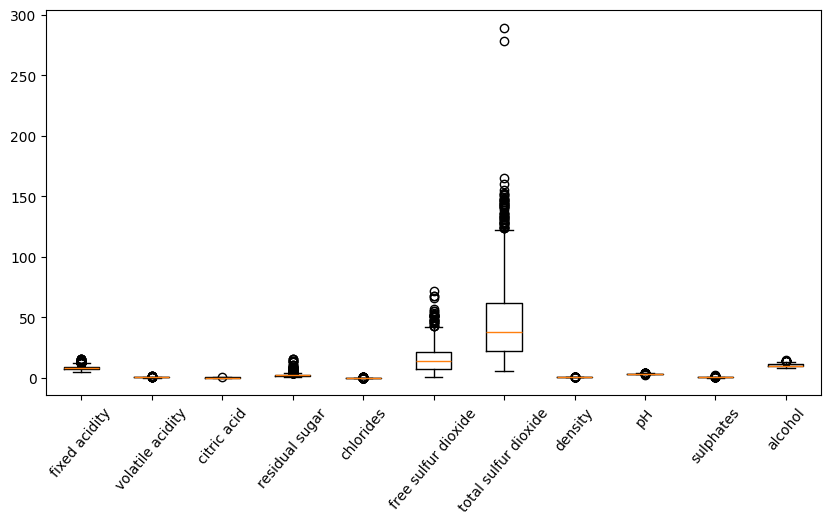

In [9]:
plt.figure(figsize = (10, 5))
plt.boxplot(red.iloc[:, :-2])
plt.xticks(np.arange(1, 12), red.columns[:-2], rotation = 50)
plt.show()

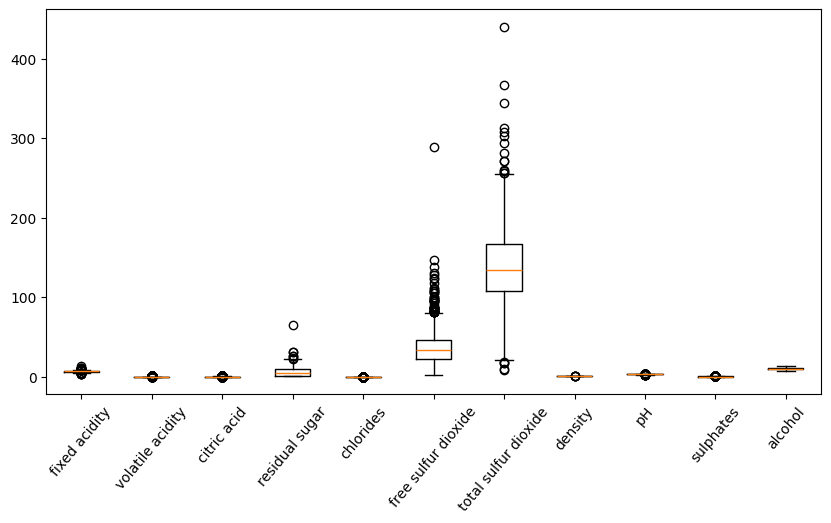

In [10]:
plt.figure(figsize = (10, 5))
plt.boxplot(white.iloc[:, :-2])
plt.xticks(np.arange(1, 12), white.columns[:-2], rotation = 50)
plt.show()

>이상치를 제거하지 않을 경우 멘트

비록 많은 이상치들이 존재하지만 이 데이터들이 잘못 입력된 데이터는 아니라고 생각하며 말도 안되는 수준으로 벗어나는 데이터는 없는 것으로 판단했기 때문에 이상치를 제거하지 않기로 결정

> 이상치를 제거할 경우 멘트

사분위수 범위(IQR)와 윗쪽 울타리, 아랫쪽 울타리 계산

In [11]:
red_Q1 = red.iloc[:, :-2].quantile(q = 0.25)
red_Q3 = red.iloc[:, :-2].quantile(q = 0.75)
white_Q1 = white.iloc[:, :-2].quantile(q = 0.25)
white_Q3 = white.iloc[:, :-2].quantile(q = 0.75)

In [12]:
red_IQR = red_Q3 - red_Q1
white_IQR = white_Q3 - white_Q1

In [13]:
red_lower_bound = red_Q1 - 1.5*red_IQR
white_lower_bound = white_Q1 - 1.5*white_IQR

In [14]:
red_upper_bound = red_Q3 + 1.5*red_IQR
white_upper_bound = white_Q3 + 1.5*white_IQR

이상치에 속하면 제거해주는 함수 생성

In [15]:
def outlier_del(data, lower, upper, col):
    for i in range(len(data[col])):
        if data[col][i] > upper.loc[col] or data[col][i] < lower.loc[col]:
            data.drop(i, inplace = True)
    data.reset_index(0, drop = True, inplace = True)

In [16]:
for i in red.columns[:-1]:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [17]:
for i in red.columns[:-2]:
    outlier_del(red, red_lower_bound, red_upper_bound, i)

In [18]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1190,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1191,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1192,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [19]:
for i in white.columns[:-2]:
    outlier_del(white, white_lower_bound, white_upper_bound, i)

In [20]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4011,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4012,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4013,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


이상치가 모두 제거된 데이터

In [21]:
wine_df = pd.concat([red, white], axis = 0, ignore_index = True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5205,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5206,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5207,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


> 분석에 앞서 레드 와인과 화이트 와인의 특징에 대해서 조사하였다.

화이트 와인 : 신선하다, 가볍다, 신맛이 난다, 상쾌하다, 탄닌이 적다  
레드 와인 : 풍부하다, 무게감이 있다, 떫다, 탄닌이 많다  

> 데이터에서 해당 특징들을 확인해 볼 수 있는 분석을 진행하였다.

### 가설 1. 레드 와인의 바디감이 화이트 와인보다 클 것이다.

In [22]:
red_wine = wine[wine['color'] == 0]
white_wine = wine[wine['color'] == 1]

In [23]:
red_density = red['density']
white_density = white['density']

#### 1) 등분산 검정

>귀무가설 : 두 집단의 분산이 같다 (σ1 = σ2)  
>대립가설 : 두 집단의 분산이 다르다 (σ1 != σ2) (유의수준 0.05라고 가정)  

바틀렛 검정 (정규성 가정에 민감한 분산의 동질성 검정)

In [24]:
bartlett(red_density, white_density)

BartlettResult(statistic=503.547564824945, pvalue=1.6073009181337432e-111)

검정통계량 : 503.54, 유의확률 : 1.60e-111

> 유의수준 0.05 하에서 귀무가설을 기각한다.  
> 따라서, 두 집단의 분산이 같다고 할 수 없다.

레벤 검정 (정규성 가정에 덜 민감한 분산의 동질성 검정)

In [25]:
levene(red_density, white_density)

LeveneResult(statistic=548.6293818414831, pvalue=1.9379551202826093e-115)

검정통계량 : 548.62, 유의확률 : 1.93e-115

> 유의수준 0.05 하에서 귀무가설을 기각한다.  
> 따라서, 두 집단의 분산이 같다고 할 수 없다.

#### 2) 웰치의 T-검정(Welch's T-test) (등분산 가정을 만족하지 않더라도 사용 가능한 T-검정)

> 등분산 가정을 만족하지 않더라도 df를 새터스웨이트 자유도(Satterthwaite df)로 계산하여 검정 가능

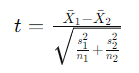

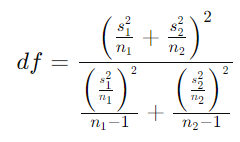

>귀무가설 : 레드 와인과 화이트 와인의 바디감 평균은 같다 (μ1 = μ2)  
>대립가설 : 레드 와인의 바디감 평균이 화이트 와인보다 높다 (μ1 > μ2) (유의수준 0.05라고 가정)  
(단, μ1 : 레드 와인의 바디감 평균, μ2 : 화이트 와인의 바디감 평균)

In [26]:
red_density.mean()

0.9965714572864321

In [27]:
white_density.mean()

0.9938610386052303

In [28]:
result1 = stats.ttest_ind(red_density, white_density, alternative = 'greater', equal_var = False)
result1

TtestResult(statistic=41.66994334525814, pvalue=2.1152106941273e-310, df=3602.7430110154432)

검정통계량 : 41.66, 유의확률 : 2.11e-310, 자유도 : 3602.74

In [29]:
t_dist = stats.t(df = result1.df)

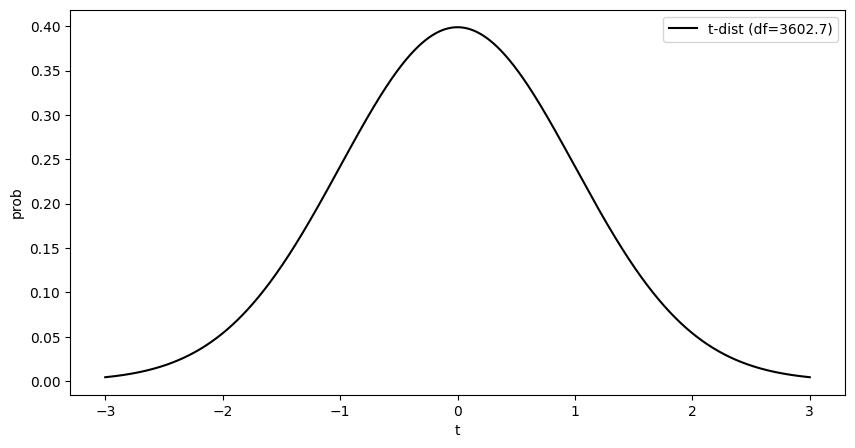

In [51]:
fig, axs = plt.subplots(figsize = (10, 5))

x = np.linspace(-3, 3, 1000)
y = [t_dist.pdf(i) for i in x]

axs.plot(x, y, color = 'black', label = f't-dist (df={round(result1.df, 1)})')
plt.xlabel('t')
plt.ylabel('prob')
plt.legend()
plt.show()

> 검정통계량이 41.66이기 때문에 유의확률이 매우 작을 수 밖에 없다.

> 유의수준 0.05 하에서 귀무가설을 기각한다.  
> 따라서, 레드 와인과 바디감이 화이트 와인보다 높다고 할 수 있다.

### 가설 2. 레드 와인의 산도가 화이트 와인보다 더 높을 것이다. (산도는 낮을수록 신맛이 난다)

In [31]:
red_ph = red['pH']
white_ph = white['pH']

In [65]:
red_ph.mean()

3.3240117252931323

In [66]:
white_ph.mean()

3.1873150684931506

#### 1) 등분산 검정

>귀무가설 : 두 집단의 분산이 같다 (σ1 = σ2)  
>대립가설 : 두 집단의 분산이 다르다 (σ1 != σ2) (유의수준 0.05라고 가정)  

바틀렛 검정 (정규성 가정에 민감한 분산의 동질성 검정)

In [32]:
bartlett(red_ph, white_ph)

BartlettResult(statistic=3.6061482970745775, pvalue=0.057566300516703736)

검정통계량 : 3.60, 유의확률 : 0.057

> 유의수준 0.05 하에서 귀무가설을 채택한다.  
> 따라서, 두 집단의 분산이 같다고 할 수 있다.

레벤 검정 (정규성 가정에 덜 민감한 분산의 동질성 검정)

In [33]:
levene(red_ph, white_ph)

LeveneResult(statistic=3.337258314838406, pvalue=0.06778459142340153)

검정통계량 : 3.33, 유의확률 : 0.067

> 유의수준 0.05 하에서 귀무가설을 채택한다.  
> 따라서, 두 집단의 분산이 같다고 할 수 있다.

#### 2) 독립표본 T-검정(T-test) (등분산 가정을 만족할때 사용하는 T-검정)

>귀무가설 : 레드 와인과 화이트 와인의 산도(pH) 평균은 같다 (μ1 = μ2)  
>대립가설 : 레드 와인의 산도(pH) 평균이 화이트 와인보다 크다 (μ1 > μ2) (유의수준 0.05라고 가정)  
(단, μ1 : 레드 와인의 산도(pH) 평균, μ2 : 화이트 와인의 산도(pH) 평균)

In [34]:
red_ph.mean()

3.3240117252931323

In [35]:
white_ph.mean()

3.1873150684931506

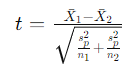

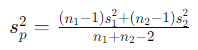

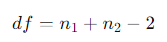

In [36]:
red['fixed acidity'].mean()

8.166582914572864

In [37]:
white['fixed acidity'].mean()

6.813387297633873

In [38]:
result2 = stats.ttest_ind(red_ph, white_ph, alternative = 'greater', equal_var = True)
result2

TtestResult(statistic=30.312608117481005, pvalue=2.5202968334687466e-186, df=5207.0)

검정통계량 : 30.31, 유의확률 : 2.52e-186, 자유도 : 5207

In [94]:
t_dist = stats.t(df = result2.df, loc = 0, scale = 1)
norm_dist = stats.norm(loc = 0, scale = 1)

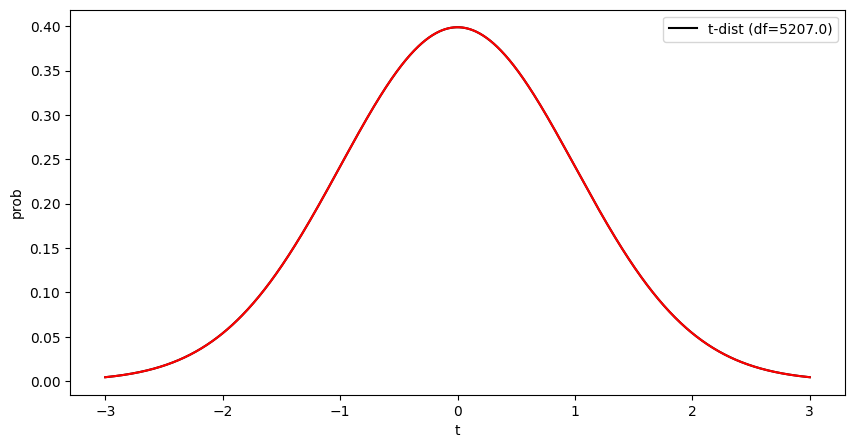

In [98]:
fig, axs = plt.subplots(figsize = (10, 5))

x = np.linspace(-3, 3, 1000)
y = [t_dist.pdf(i) for i in x]
y_n = [norm_dist.pdf(i) for i in x]

axs.plot(x, y, color = 'black', label = f't-dist (df={round(result2.df, 1)})')
axs.plot(x, y_n, color = 'red')
plt.legend()
plt.xlabel('t')
plt.ylabel('prob')
plt.show()

> 검정통계량이 30.31이기 때문에 유의확률이 매우 작을 수 밖에 없다.

> 유의수준 0.05 하에서 귀무가설을 기각한다.  
> 따라서, 레드 와인의 산도가 화이트 와인보다 더 높다고 할 수 있다.

### 가설 3. 알코올 도수가 높으면 밀도가 낮아질 것이다. (상관관계가 존재할 것이다)

> 알코올이 물보다 비중이 낮아(물 100ml = 100g, 알코올 100ml = 79g) 알코올이 많이 들어있으면 밀도가 낮아질 것이다.

>귀무가설 : 알코올과 밀도 간의 상관관계가 없다 (ρ = 0)  
>대립가설 : 알코올과 밀도 간의 음의 상관관계가 있다 (ρ < 0) (유의수준 0.05라고 가정)  

In [41]:
# 알코올 변수 스케일링 (해도 되고 안해도 됨) 다중 회귀일때는 해주는게 좋음
scaler = StandardScaler()
x_scaled = scaler.fit_transform(wine_df.iloc[:, :-2])
scaled_df = pd.DataFrame(x_scaled, columns = wine_df.columns[:-2])
scaled_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.270810,0.254661,-0.146482,0.486573,-0.298577,-0.350189,0.424548,-0.167117,0.314124,-0.100130
volatile acidity,0.270810,1.000000,-0.467305,-0.243546,0.600563,-0.395461,-0.477475,0.286601,0.319364,0.296559,-0.054932
citric acid,0.254661,-0.467305,1.000000,0.118441,-0.188763,0.170133,0.234085,-0.011140,-0.301673,-0.023377,0.057995
residual sugar,-0.146482,-0.243546,0.118441,1.000000,-0.177228,0.458528,0.526710,0.543525,-0.300674,-0.222761,-0.386594
chlorides,0.486573,0.600563,-0.188763,-0.177228,1.000000,-0.350039,-0.453387,0.566514,0.271621,0.435510,-0.342806
free sulfur dioxide,-0.298577,-0.395461,0.170133,0.458528,-0.350039,1.000000,0.740502,0.039232,-0.201541,-0.224225,-0.157652
total sulfur dioxide,-0.350189,-0.477475,0.234085,0.526710,-0.453387,0.740502,1.000000,0.042807,-0.280388,-0.318543,-0.249648
density,0.424548,0.286601,-0.011140,0.543525,0.566514,0.039232,0.042807,1.000000,0.068228,0.271662,-0.749023
pH,-0.167117,0.319364,-0.301673,-0.300674,0.271621,-0.201541,-0.280388,0.068228,1.000000,0.280894,0.057415
sulphates,0.314124,0.296559,-0.023377,-0.222761,0.435510,-0.224225,-0.318543,0.271662,0.280894,1.000000,-0.044721


스케일링 해준 산점도

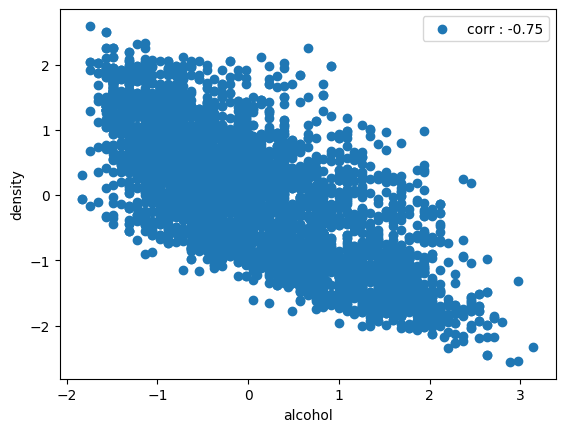

In [42]:
plt.scatter(scaled_df['alcohol'], scaled_df['density'],
            label = f"corr : {round(scaled_df[['density', 'alcohol']].corr().iloc[0,1], 2)}")
plt.legend()
plt.xlabel('alcohol')
plt.ylabel('density')
plt.show()

스케일링 안한 산점도

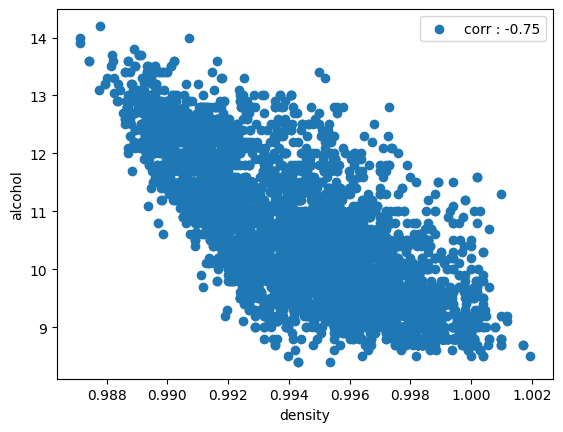

In [43]:
plt.scatter(wine_df['density'], wine_df['alcohol'],
            label = f"corr : {round(wine_df[['density', 'alcohol']].corr().iloc[0,1], 2)}")
plt.legend()
plt.xlabel('density')
plt.ylabel('alcohol')
plt.show()

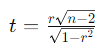

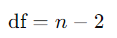

In [44]:
# 상관 분석
pearsonr(wine_df['density'], wine_df['alcohol'], alternative = 'less')

PearsonRResult(statistic=-0.7490226495989675, pvalue=0.0)

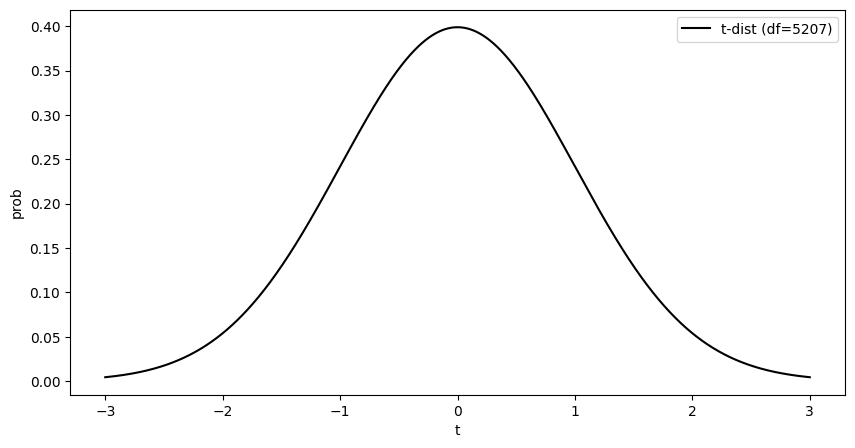

In [53]:
t_dist = stats.t(df = len(wine_df) - 2)

fig, axs = plt.subplots(figsize = (10, 5))

x = np.linspace(-3, 3, 1000)
y = [t_dist.pdf(i) for i in x]

axs.plot(x, y, color = 'black', label = f't-dist (df={len(wine_df) - 2})')
plt.legend()
plt.xlabel('t')
plt.ylabel('prob')
plt.show()

> 검정통계량이 -0.74이기 때문에 유의확률이 매우 작을 수 밖에 없다.

> 유의수준 0.05 하에서 귀무가설을 기각한다.  
> 따라서, 알코올과 밀도 간의 음의 상관관계가 있다.

### 가설 4. 와인 색깔 예측 모형 구축 

In [99]:
X = wine.iloc[:, :-1] # 독립변수
y = wine['color'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# 데이터 스케일링 (수치형 변수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [100]:
# 데이터 스케일링 (수치형 변수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_scaled, y_train)

# 예측
y_pred = model.predict(X_scaled)

# 평가
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

# 모델 계수 출력
print("Model Coefficients:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)

Confusion Matrix:
[[3899   13]
 [  19 1266]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3912
           1       0.99      0.99      0.99      1285

    accuracy                           0.99      5197
   macro avg       0.99      0.99      0.99      5197
weighted avg       0.99      0.99      0.99      5197

Model Coefficients:
[[ 0.36907798  1.29401329 -0.36287684 -3.57862293  0.79205655  0.93706383
  -2.95310731  3.5087579   0.33391421  0.61707462  1.22368381  0.20372537]]
Intercept:
[-4.19044926]


In [ ]:
model

In [101]:
model.coef_

array([[ 0.36907798,  1.29401329, -0.36287684, -3.57862293,  0.79205655,
         0.93706383, -2.95310731,  3.5087579 ,  0.33391421,  0.61707462,
         1.22368381,  0.20372537]])

In [102]:
def calc_prob(coef):
    e = np.e
    p_value = (e ** coef) / (1 + (e ** coef))
    return p_value

In [103]:
calc_prob(model.coef_)

array([[0.59123617, 0.78482571, 0.41026334, 0.02715607, 0.68827274,
        0.71850618, 0.04958986, 0.97093593, 0.58271146, 0.64955292,
        0.77271118, 0.55075592]])

로지스틱 회귀모형 해석

In [104]:
# 테스트 데이터 스케일링
X_test_scaled = scaler.transform(X_test)

# 테스트 데이터셋에 대해 예측
y_test_pred = model.predict(X_test_scaled)

# 평가
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:
[[981   5]
 [  8 306]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.98      0.97      0.98       314

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [126]:
print(f"표준화 한 설명변수 값: (고정산도, 휘발성 산도, ..., 알코올, 품질)"
      f"\n{X_test_scaled[0]}\n와인의 종류: {y_test.to_list()[0]} (0: 화이트, 1: 레드)")

표준화 한 설명변수 값: (고정산도, 휘발성 산도, ..., 알코올, 품질)
[-0.1721767  -0.54303355  0.90013042 -0.65328671 -0.32082382  0.53259574
  0.04149221 -1.34998708 -0.3632329  -0.35397899  1.17959322  1.34345237]
와인의 종류: 0 (0: 화이트, 1: 레드)


이 데이터는 화이트 와인의 데이터이다.

In [127]:
logit = model.decision_function(X_test_scaled[0].reshape(1, -1))
logit

array([-6.182377])

> 예를들어 이 와인의 데이터를 입력하였을때의 로짓값을 구하면 7.57이 나온다

In [128]:
probability = 1 / (1 + np.exp(-logit[0]))
probability

0.0020612547458882333

> 이 로짓값을 시그모이드 함수에 넣으면 확률은 0.999로 약 99.9% 확률로 레드와인(Y=1)이라는 뜻이다.  
> 실제로도 이 데이터는 레드 와인의 데이터이므로 예측을 잘 한 것으로 보인다.